In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

# Data Preparation


In [2]:
iris = pd.read_csv(r'C:\cpp\iris.csv')

In [3]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.shape

(150, 6)

In [5]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
iris.Species.value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

# Data Cleaning


In [8]:
iris.drop(columns=['Id'],inplace=True)

In [9]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
iris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Exploratory Data Analysis

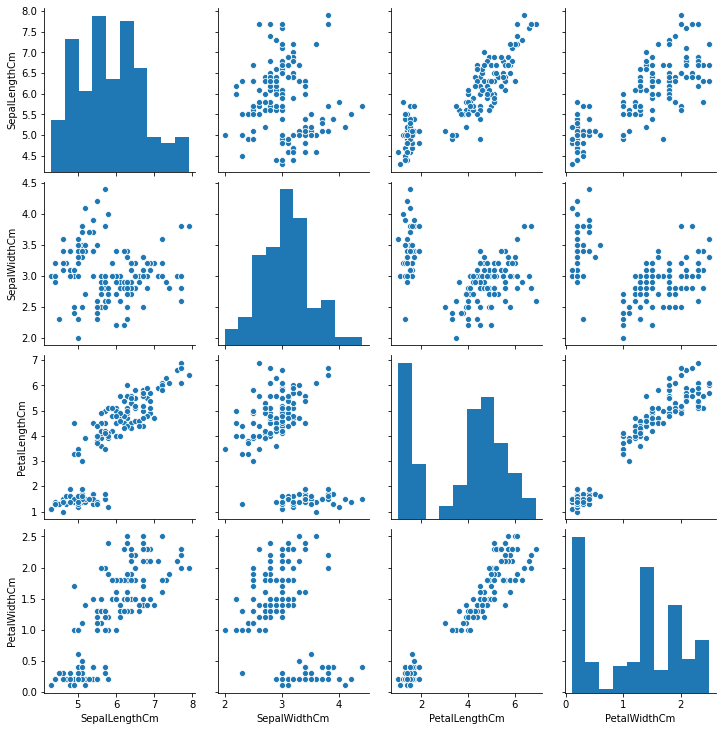

In [11]:
sns.pairplot(iris)

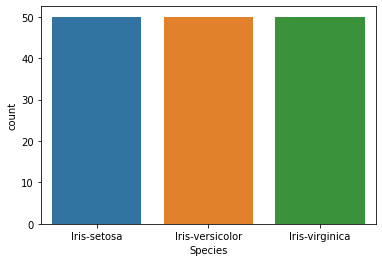

In [12]:
sns.countplot(iris['Species'])

In [13]:
categorical=['Species']
numerical=[]
for i in iris.columns:
    if i!='Species':
        numerical.append(i)

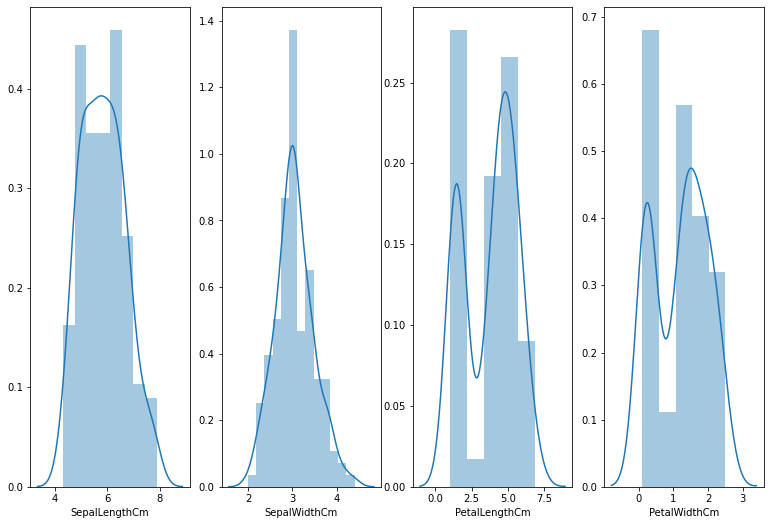

In [14]:
plt.figure(figsize=[20,30])
for i in enumerate(numerical):
    plt.subplot(3,6,i[0]+1)
    sns.distplot(iris[i[1]])

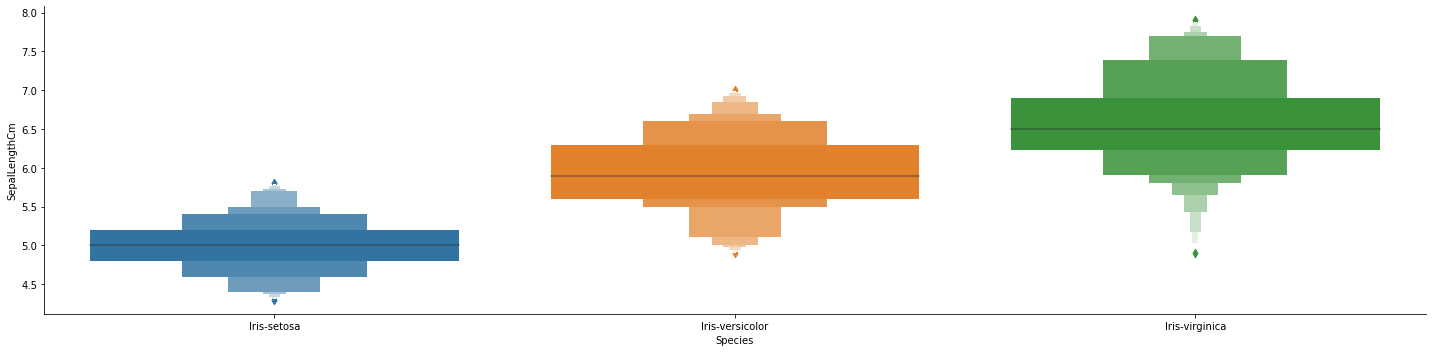

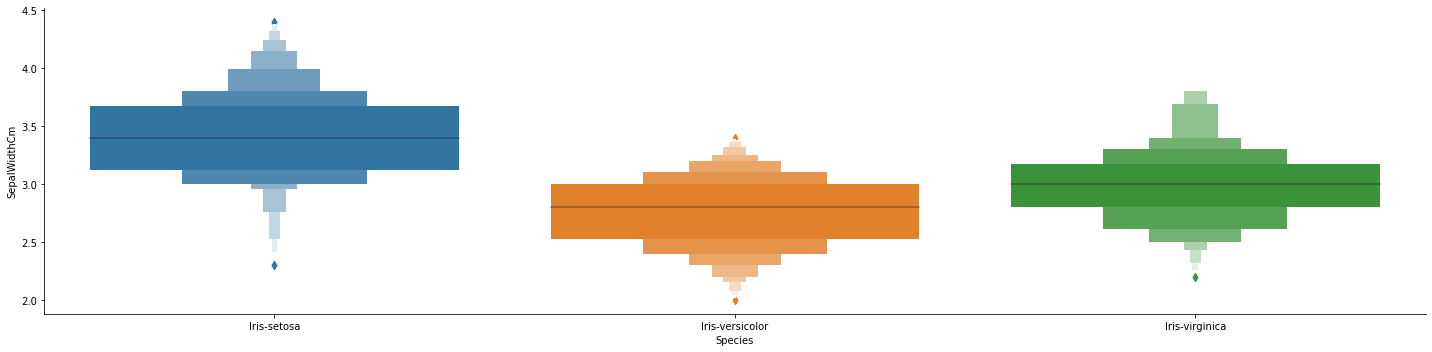

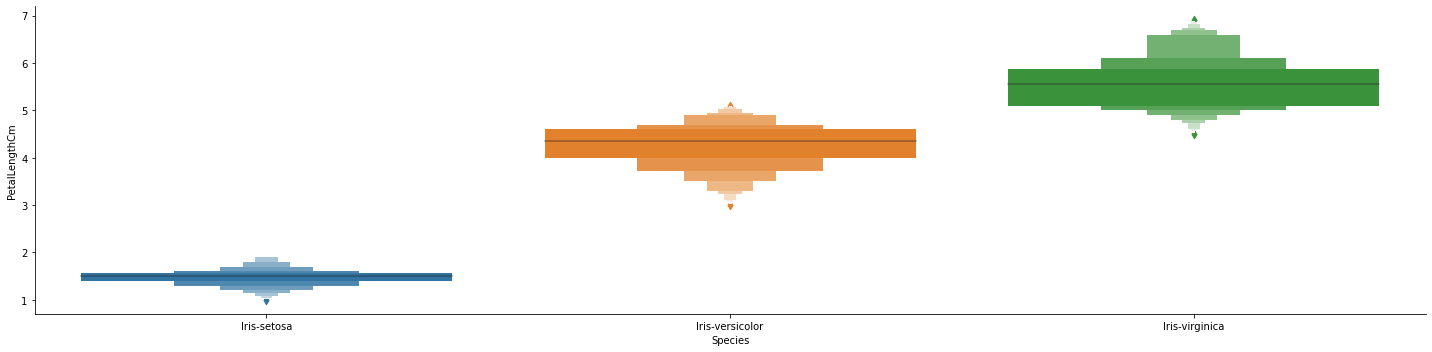

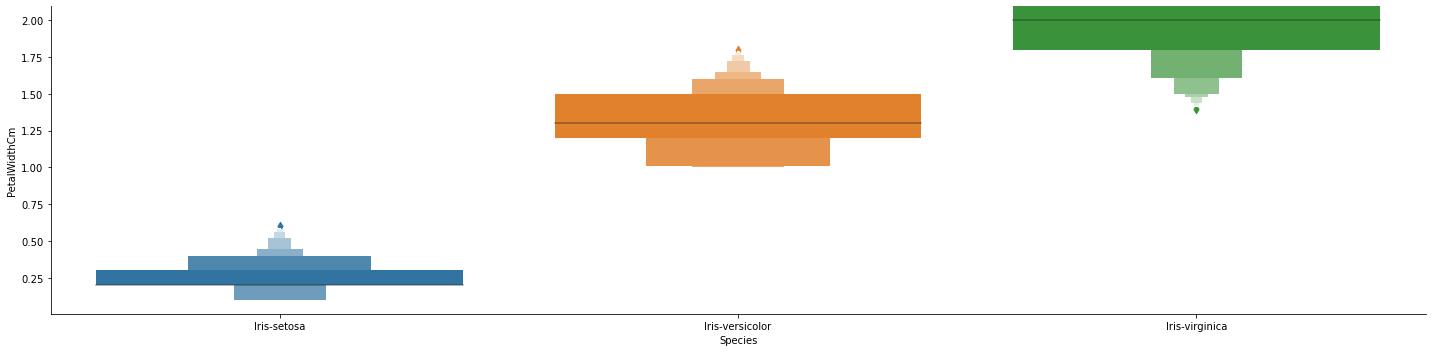

In [15]:
for i in numerical:
    sns.catplot(x='Species',y=i,data=iris,kind='boxen',aspect=4)

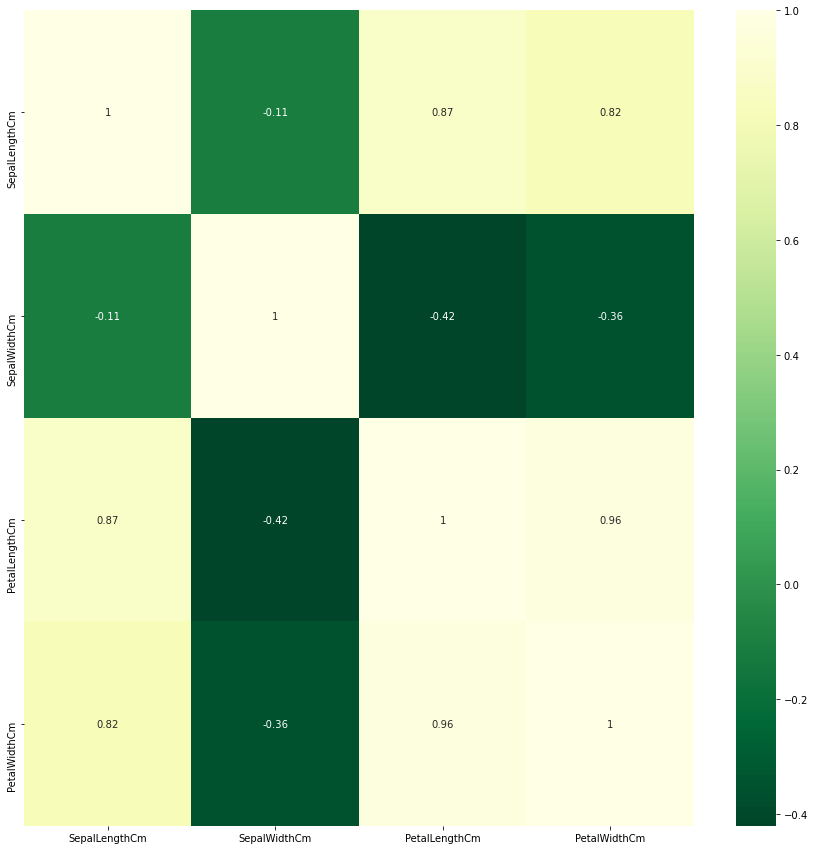

In [34]:
correlation = iris[:-1].corr()
plt.figure(figsize=[15,15])
sns.heatmap(correlation,cmap='YlGn_r',annot=True)

# Train-Test Splitting 


In [17]:
X = iris.drop(columns=['Species'])
Y = iris.loc[:,['Species']]

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [20]:
X_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
22,4.6,3.6,1.0,0.2
15,5.7,4.4,1.5,0.4
65,6.7,3.1,4.4,1.4
11,4.8,3.4,1.6,0.2
42,4.4,3.2,1.3,0.2


In [21]:
Y_train.head()

,Species
22,Iris-setosa
15,Iris-setosa
65,Iris-versicolor
11,Iris-setosa
42,Iris-setosa


# Model training

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
dt = DecisionTreeClassifier(criterion='gini')

In [24]:
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

# Visualizing the Decision Tree model


In [46]:
from sklearn import tree
text_representation = tree.export_text(dt)
print(text_representation)


|--- feature_2 <= 2.45
|   |--- class: Iris-setosa
|--- feature_2 >  2.45
|   |--- feature_2 <= 4.75
|   |   |--- feature_3 <= 1.65
|   |   |   |--- class: Iris-versicolor
|   |   |--- feature_3 >  1.65
|   |   |   |--- class: Iris-virginica
|   |--- feature_2 >  4.75
|   |   |--- feature_3 <= 1.75
|   |   |   |--- feature_2 <= 4.95
|   |   |   |   |--- class: Iris-versicolor
|   |   |   |--- feature_2 >  4.95
|   |   |   |   |--- feature_3 <= 1.55
|   |   |   |   |   |--- class: Iris-virginica
|   |   |   |   |--- feature_3 >  1.55
|   |   |   |   |   |--- feature_2 <= 5.45
|   |   |   |   |   |   |--- class: Iris-versicolor
|   |   |   |   |   |--- feature_2 >  5.45
|   |   |   |   |   |   |--- class: Iris-virginica
|   |   |--- feature_3 >  1.75
|   |   |   |--- feature_2 <= 4.85
|   |   |   |   |--- feature_1 <= 3.10
|   |   |   |   |   |--- class: Iris-virginica
|   |   |   |   |--- feature_1 >  3.10
|   |   |   |   |   |--- class: Iris-versicolor
|   |   |   |--- feature_2 >  4.8

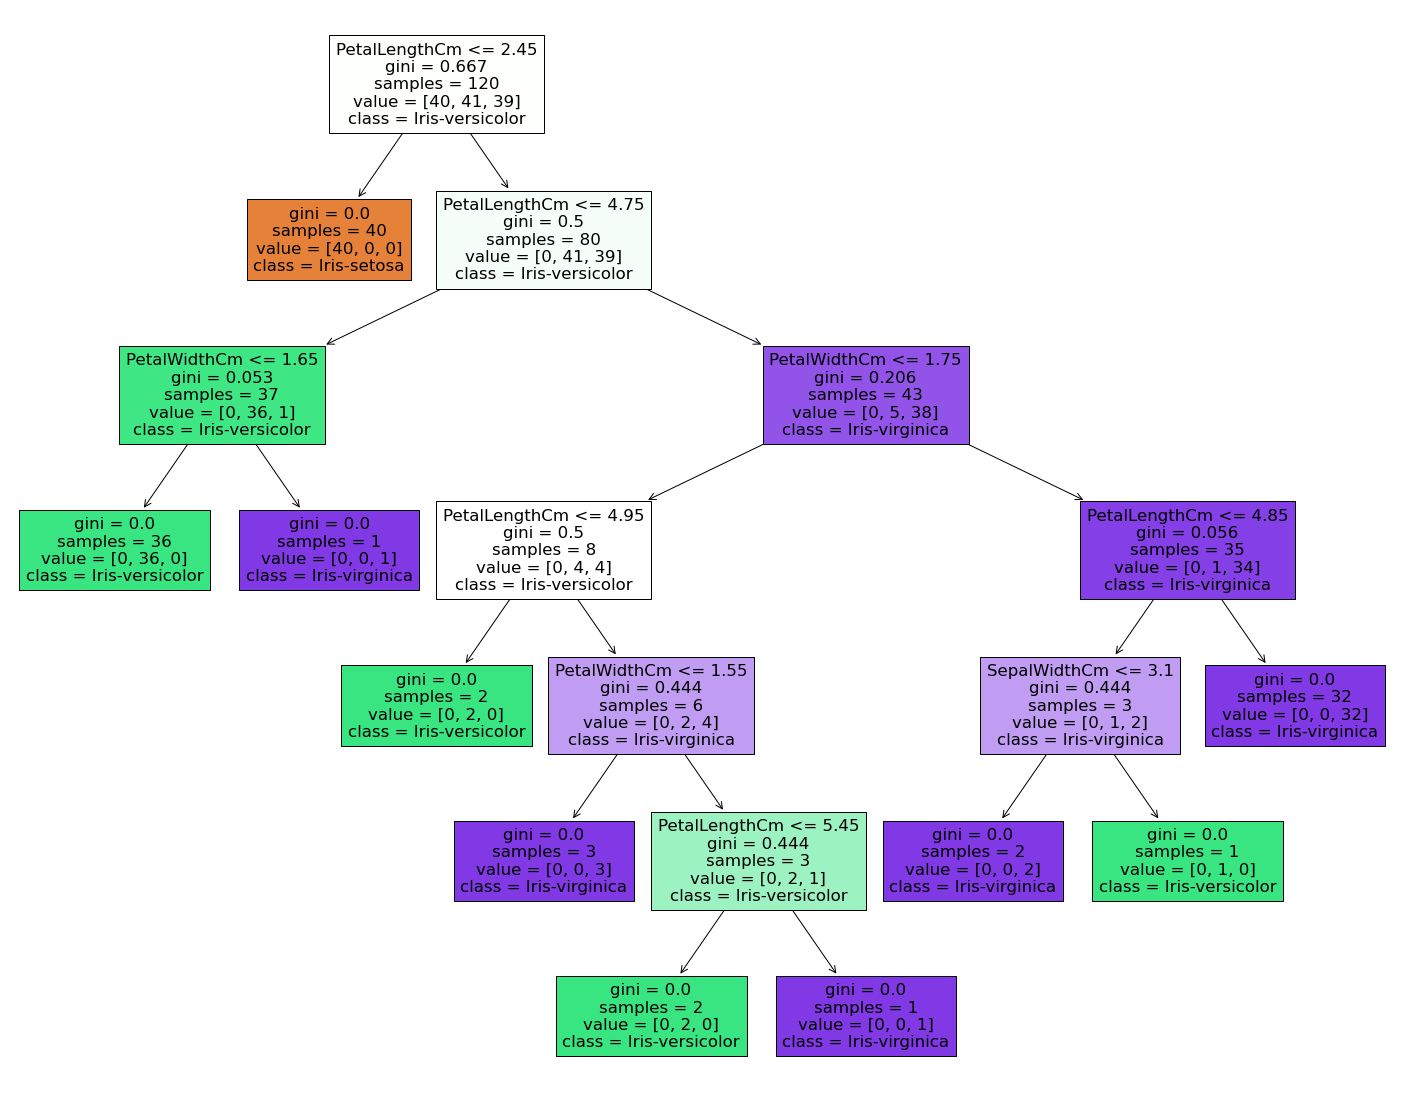

In [44]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt, 
                   feature_names=list(X_train.columns),  
                   class_names=list(Y_train.Species.unique()),
                   filled=True)


In [25]:
dt.score(X_train,Y_train)

1.0

In [26]:
dt.score(X_test,Y_test)

1.0

In [27]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [28]:
y_pred = dt.predict(X_test)

In [29]:
accuracy_score(Y_test,y_pred)

1.0

In [30]:
confusion_matrix(Y_test,y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [31]:
print(classification_report(Y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

